<a href="https://colab.research.google.com/github/geoferreira1/pos_tech_fiap/blob/main/tech_challenge_data_analytics_fase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TECH CHALLENGE :
Tech Challenge é o projeto que englobará os conhecimentos obtidos em todas as disciplinas da fase. Esta é uma atividade que, em princípio, deve ser desenvolvida em grupo. Importante atentar-se ao prazo de entrega, pois trata-se de uma atividade obrigatória, uma vez que sua pontuação se refere a 90% da nota final.

## O problema
Você foi recentemente alocado em uma equipe de cientistas de dados de
um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver
um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta
ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse
modelo será usado como insumo para alimentar dashboards internos de tomada
de decisão dos analistas quantitativos da empresa.

## Dados
Utilize os dados históricos do índice IBOVESPA, disponíveis
publicamente: https://br.investing.com/indices/bovespa-historical-data

### Requisitos:
- Selecione o período “diário”.
- Baixe um intervalo de pelo menos 2 anos de dados.
- Realize o pré-processamento necessário para utilizar os dados no modelo.

## Objetivo
Criar um modelo que preveja se o fechamento do IBOVESPA do dia
seguinte será maior ou menor que o do dia atual, ou seja:

Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima
de 75% em um conjunto de teste. O conjunto de testes deverá conter o último
mês (30 dias) de dados disponíveis.

## Entregas Esperadas
Você deverá apresentar ao time de investimentos:
### Storytelling Técnico
Apresentação com os seguintes requisitos:
- Aquisição e exploração dos dados;
- Estratégia de engenharia de atributos, caso seja realizado (por
exemplo: variações, médias móveis, etc)
- Preparação da base para previsão (definição de target, janela de
tempo, etc.);
- Escolha e justificativa do modelo utilizado;
- Resultados e análise de métricas que garantem que o modelo está
confiável;

### Justificativa Técnica
Explique claramente:
- Por que você escolheu o(s) modelo(s) utilizados (ex: árvores,
regressão logística, LSTM, etc.);
- Como tratou a natureza sequencial dos dados (ex: janelas deslizantes,
features lagged);
- Quais os trade-offs entre acuracidade e overfitting.
Quais documentos devo subir na plataforma? As entregas deverão conter
necessariamente:
- Uma pasta zip contendo todos os arquivos do projeto, ou um link para
o repositório do GitHub com seu projeto.
- Apresentação do storytelling. Pode ser em PPT, PDF ou ferramentas
da sua preferência, como o CANVAS, por exemplo.
- Vídeo de no máximo 5 (cinco) minutos, com uma visão gerencial,
explicando como interpretar os resultados obtidos. Note que é
necessário que todos os membros do grupo apareçam no vídeo.

*Dica: Utilize o maior intervalo de tempo possível para atingir maior
acuracidade no modelo preditivo.*

Lembre-se que você poderá apresentar o desenvolvimento do seu projeto
durante as lives e grupos de estudo com os(as) docentes. Essas são ótimas
oportunidades para discutir sobre as dificuldades encontradas, além de pegar
dicas valiosas com especialistas e colegas de turma.

Não se esqueça que isso é um entregável obrigatório! Se atente para o
prazo de entrega até o final da fase.

# Importa bibliotecas

In [ ]:
# Atualiza pip e corrige eventuais conflitos com numpy
!pip install --upgrade pip
!pip install numpy #==1.23.5 --quiet # Versão compatível com pandas_ta

# Instala bibliotecas robustas de modelagem
!pip install statsforecast
!pip install catboost
!pip install lightgbm
!pip install xgboost

# Instala pandas_ta com numpy compatível
#!pip install pandas_ta# --no-cache-dir

# Prophet exige dependências específicas
!pip install prophet --no-binary# :all: --no-cache-dir


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --no-binary#


In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np
#import pandas_ta as ta
import calendar
from datetime import date

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Séries temporais
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Modelagem de séries temporais (forecast)
from statsforecast import StatsForecast
from statsforecast.models import (
    AutoARIMA, ARIMA, Naive, SeasonalNaive,
    SeasonalWindowAverage, WindowAverage
)
from statsforecast.utils import ConformalIntervals
from prophet import Prophet

# Machine learning - Regressão e Classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Métricas
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Importar função especifica de um módulo --> Melhores hiperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.pipeline import Pipeline

# Import de configuraçoes
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

import logging

# Reduz o nível de logs para silenciar
logging.getLogger("cmdstanpy").setLevel(logging.CRITICAL)
logging.getLogger("prophet").setLevel(logging.CRITICAL)

import sys, os
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')  # Oculta temporariamente

# ... rode seus modelos Prophet, ARIMA aqui ...

sys.stderr = stderr  # Restaura saída de erro



# Importa dataset

In [ ]:
url = "https://raw.githubusercontent.com/geoferreira1/pos_tech_fiap/main/pos_tech_fiap_fase_2/Dados%20Histo%CC%81ricos%20-%20Ibovespa%20(3).csv"
df = pd.read_csv(url, encoding='utf-8')

# Exibir as primeiras linhas para entender a estrutura
print(df.head())


         Data   Último  Abertura   Máxima   Mínima   Vol.    Var%
0  17.07.2025  135.565   135.515  135.792  135.016  6,80B   0,04%
1  16.07.2025  135.511   135.250  135.641  134.265  7,83B   0,19%
2  15.07.2025  135.250   135.298  136.022  134.380  6,90B  -0,04%
3  14.07.2025  135.299   136.187  136.187  134.840  7,33B  -0,65%
4  11.07.2025  136.187   136.742  136.742  135.528  7,40B  -0,41%


# Funções

In [ ]:
# Converte informações de casas decimais
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace('.', '').replace(',', '.')
        if 'B' in value:
            return float(value.replace('B', '')) * 1_000_000_000
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return value

In [ ]:
# Converte informações de percentuais

def convert_percentage_to_float(value):
    if isinstance(value, str) and '%' in value:
        value = value.replace('%', '').replace(',', '.')
        if '-' in value:
            value = value.replace('-', '')
            return float(value) * -1
        else:
            return float(value)
    return value

In [ ]:
def calcular_RSI(data, window):
    delta = data.diff(1) # diff(1): Calcula a diferença entre o preço atual e o preço anterior
    gain = delta.where(delta > 0, 0) # Mantém as diferenças positivas e define as negativas como 0.
    loss = -delta.where(delta < 0, 0) # Mantém as diferenças negativas (como valores positivos) e define as positivas como 0.

    avg_gain = gain.rolling(window=window, min_periods=1).mean() # Calcula a média móvel dos ganhos e perdas.
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss # Relativa Força: ratio de ganho médio para perda média
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [ ]:

def calcular_bollinger_bands(data, window):
    MA = data.rolling(window=window).mean() # Calcula a média móvel simples.
    std = data.rolling(window=window).std() # Calcula o desvio padrão móvel
    upper_band = MA + (std * 2)
    lower_band = MA - (std * 2)
    return upper_band, lower_band


In [ ]:
def wmape(y_true, y_pred):
    return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [ ]:
def converte_direcao_binaria(y_real, y_pred):
    if len(y_real) <= 1 or len(y_pred) <= 1:
        return None, None

    y_real_bin = (np.diff(y_real) > 0).astype(int)
    y_pred_bin = (np.diff(y_pred) > 0).astype(int)

    if len(y_real_bin) != len(y_pred_bin):
        print("Erro: vetores binários de tamanhos diferentes")
        return None, None

    return y_real_bin, y_pred_bin

def calcula_metricas_direcao(df_forecast, col_predicao, col_real='y'):
    if col_predicao in df_forecast.columns:
        df_valid = df_forecast.dropna(subset=[col_predicao])
        y_real = df_valid[col_real].values
        y_pred = df_valid[col_predicao].values

        y_real_bin, y_pred_bin = converte_direcao_binaria(y_real, y_pred)

        if y_real_bin is not None and y_pred_bin is not None:
            acc = accuracy_score(y_real_bin, y_pred_bin)
            report = classification_report(y_real_bin, y_pred_bin, output_dict=True, zero_division=0)
            return report
        else:
            print(f"Poucos dados para calcular direção em {col_predicao}.")
    else:
        print(f"Coluna '{col_predicao}' não encontrada.")

    return {
        "accuracy": 0,
        "weighted avg": {"precision": 0, "recall": 0, "f1-score": 0}
    }


# Análise Exploratória

In [ ]:
# Aplica conversões nos campos de colume e variação percentual
df['Vol.'] = df['Vol.'].apply(convert_to_float)
df['Var%'] = df['Var%'].apply(convert_percentage_to_float)
df = df.rename(columns={'Último':'close', 'Abertura':'open','Máxima':'high','Mínima':'low','Vol.':'vol','Var%':'var'})
df.head()

,Data,close,open,high,low,vol,var
0,17.07.2025,135.565,135.515,135.792,135.016,6.800000e+09,0.04
1,16.07.2025,135.511,135.250,135.641,134.265,7.830000e+09,0.19
2,15.07.2025,135.250,135.298,136.022,134.380,6.900000e+09,-0.04
3,14.07.2025,135.299,136.187,136.187,134.840,7.330000e+09,-0.65
4,11.07.2025,136.187,136.742,136.742,135.528,7.400000e+09,-0.41


In [ ]:
# Cópia do dataset original
df_bovespa_index = df.copy()

In [ ]:
# Converte campo date em index e cria campo de ds para aplicar nos modelos
df_bovespa_index.index = pd.to_datetime(df_bovespa_index.Data, format="%d.%m.%Y")
df_bovespa_index = df_bovespa_index.rename(columns={'Data': 'ds'})
df_bovespa_index.sort_index(inplace=True)
df_bovespa_index.head()

,ds,close,open,high,low,vol,var
Data,,,,,,,
2005-07-18,18.07.2005,25.321,25.222,25.412,24.916,52170000.0,0.39
2005-07-19,19.07.2005,25.271,25.312,25.312,24.960,119270000.0,-0.20
2005-07-20,20.07.2005,25.705,25.268,25.795,24.970,130630000.0,1.72
2005-07-21,21.07.2005,25.842,25.706,25.964,25.505,109500000.0,0.53
2005-07-22,22.07.2005,25.391,25.834,25.848,25.244,166890000.0,-1.75


In [ ]:
# Verifica tamanho do dataset
df_bovespa_index.shape

(4954, 7)

In [ ]:
# Verifica informaçöes do dataset
df_bovespa_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4954 entries, 2005-07-18 to 2025-07-17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      4954 non-null   object 
 1   close   4954 non-null   float64
 2   open    4954 non-null   float64
 3   high    4954 non-null   float64
 4   low     4954 non-null   float64
 5   vol     4953 non-null   float64
 6   var     4954 non-null   float64
dtypes: float64(6), object(1)
memory usage: 309.6+ KB


In [ ]:
# Gerando a estatistica descritiva do data frame
df_bovespa_index.describe()

,close,open,high,low,vol,var
count,4954.000000,4954.000000,4954.000000,4954.000000,4.953000e+03,4954.000000
mean,75.035485,75.013741,75.724731,74.312775,2.878935e+08,0.047677
std,29.587827,29.583856,29.731904,29.441148,1.691580e+09,1.653885
min,24.531000,24.506000,24.899000,24.328000,1.121000e+05,-14.780000
25%,52.911500,52.904250,53.424500,52.292250,2.820000e+06,-0.797500
50%,64.516500,64.513500,65.136000,63.893500,4.430000e+06,0.060000
75%,102.944750,102.943750,104.054250,102.101000,1.086000e+07,0.927500
max,141.264000,141.265000,141.564000,140.597000,2.487000e+10,14.660000


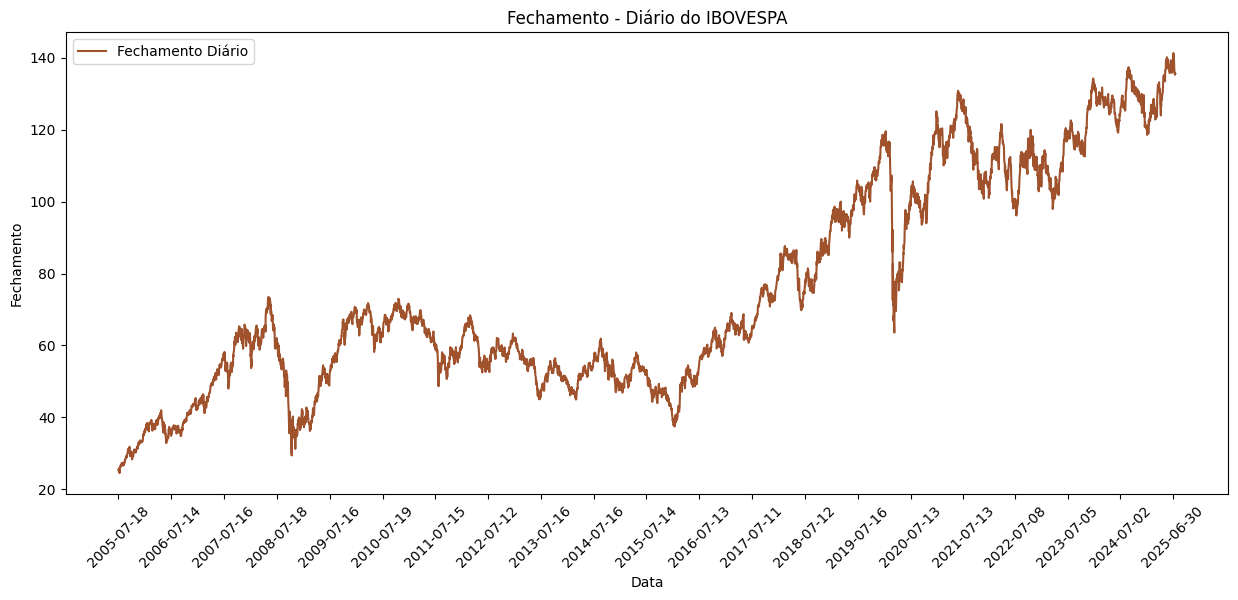

In [ ]:
#plota o gráfico de fechamento diário
plt.figure(figsize=(15, 6))
plt.plot(df_bovespa_index.index, df_bovespa_index['close'], label='Fechamento Diário', color= 'sienna')
plt.title('Fechamento - Diário do IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')

n_labels = 20
labels = df_bovespa_index.index[::len(df_bovespa_index) // n_labels]

plt.xticks(labels, rotation=45)

plt.legend()
plt.show()

In [ ]:
# Agrupa os dados por ano e conta o número de entradas.
df_bovespa_index['ds'] = pd.to_datetime(df_bovespa_index.index, format='%d.%m.%Y', dayfirst=True)
df_bovespa_index['anual_dias'] = df_bovespa_index['ds'].dt.year

days_per_year = df_bovespa_index.groupby('anual_dias').size()

print(sum(days_per_year)/20)

247.7


In [ ]:
result = seasonal_decompose(df_bovespa_index['close'], model='multiplicative', period=248) # Assumindo um ano de 248 dias úteis


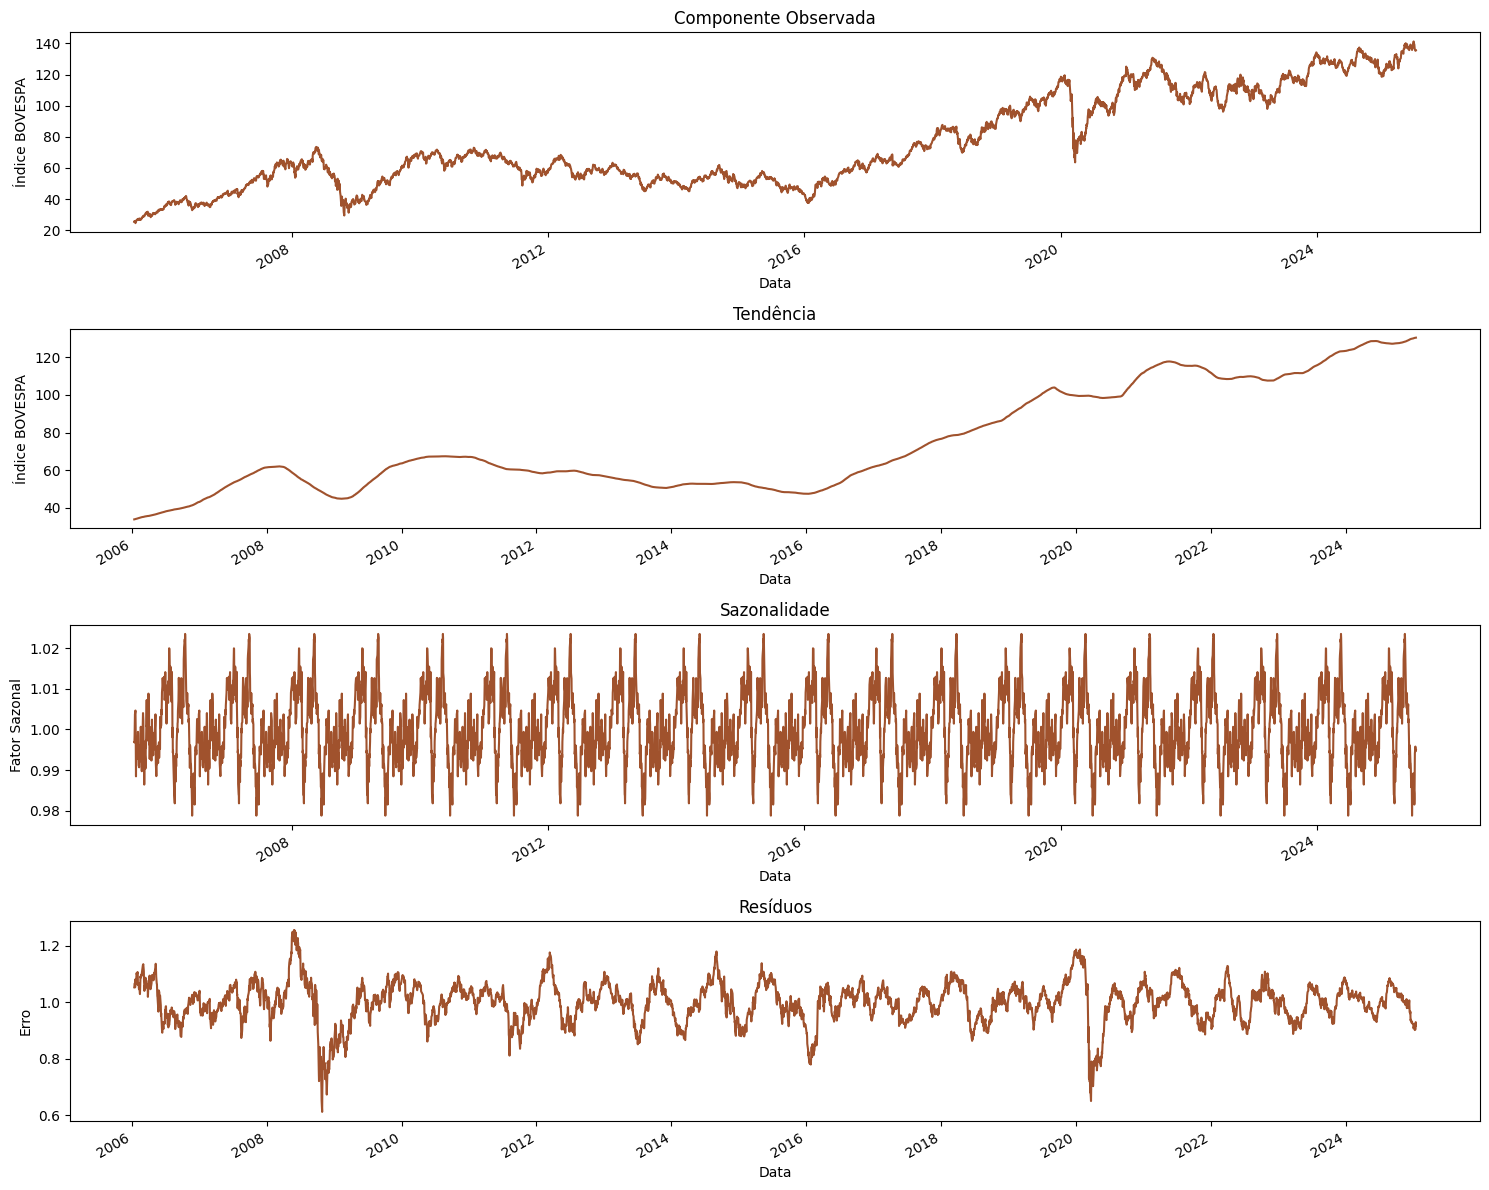

In [ ]:
# Verifica como a série está se comportando
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

result.observed.plot(ax=ax1, color='sienna')
ax1.set_title("Componente Observada")
ax1.set_ylabel("Índice BOVESPA")
result.trend.plot(ax=ax2, color='sienna')
ax2.set_title("Tendência")
ax2.set_ylabel("Índice BOVESPA")
result.seasonal.plot(ax=ax3, color='sienna')
ax3.set_title("Sazonalidade")
ax3.set_ylabel("Fator Sazonal")
result.resid.plot(ax=ax4, color='sienna')
ax4.set_title("Resíduos")
ax4.set_ylabel("Erro")


# Eixo X compartilhado (datas)
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel("Data")

plt.tight_layout()

In [ ]:
# Separa variável para verificar informações de Adfuller
X = df_bovespa_index.close.values

In [ ]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -1.0865990055922532
P-Value: 0.7203863727437085
Valores críticos:
	1%: -3.4316730935871242
	5%: -2.862124662862655
	10%: -2.5670812169966704


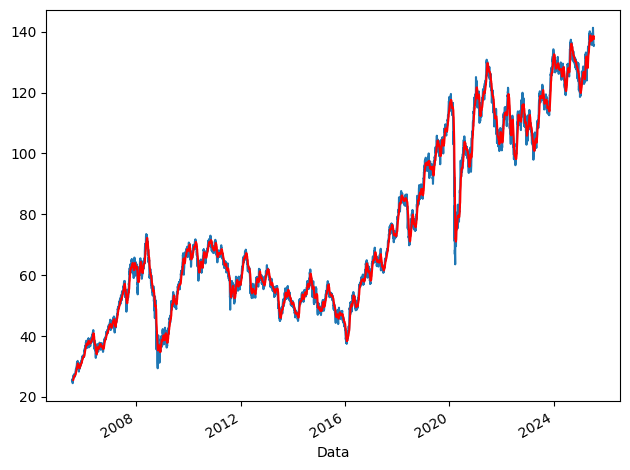

In [ ]:
ma = df_bovespa_index.close.rolling(12).mean()

f, ax = plt.subplots()
df_bovespa_index.close.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

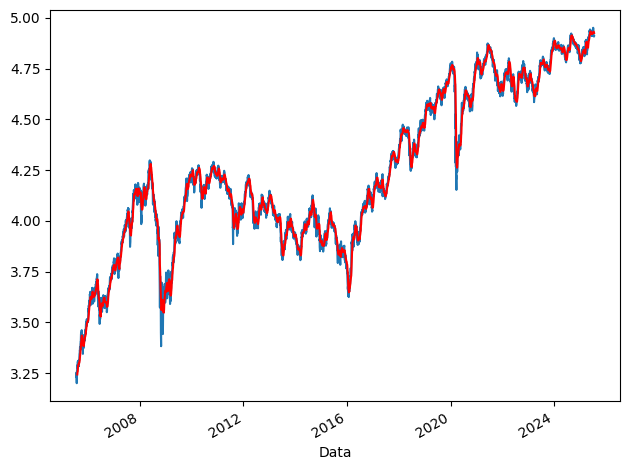

In [ ]:
df_log = np.log(df_bovespa_index['close'])
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

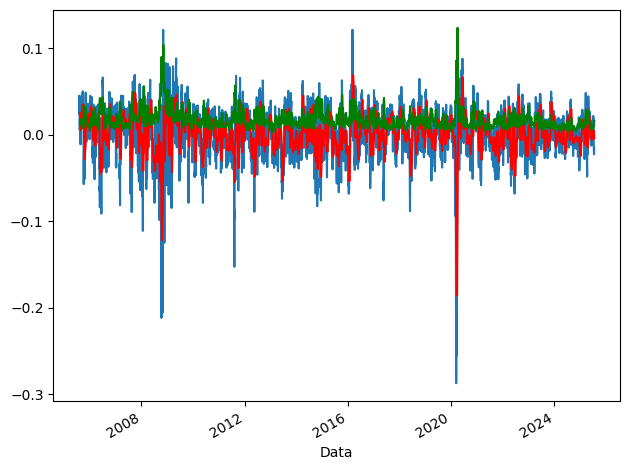

In [ ]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


In [ ]:
X_s = df_s.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")


Teste ADF
Teste Estatístico: -15.043241618718001
P-Value: 9.525568000535875e-28
Valores críticos:
	1%: -3.4316768520471537
	5%: -2.8621263233210503
	10%: -2.5670821009250306


Teste ADF
Teste Estatístico: -19.803806672679205
P-Value: 0.0
Valores críticos:
	1%: -3.4316822584676556
	5%: -2.8621287118318834
	10%: -2.567083372425426


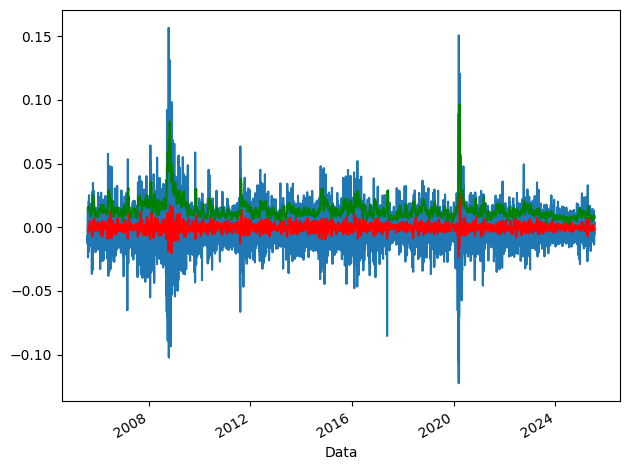

In [ ]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()


f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_diff.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [ ]:
# Cria variável para verificar os indicadores ACF e PACF
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

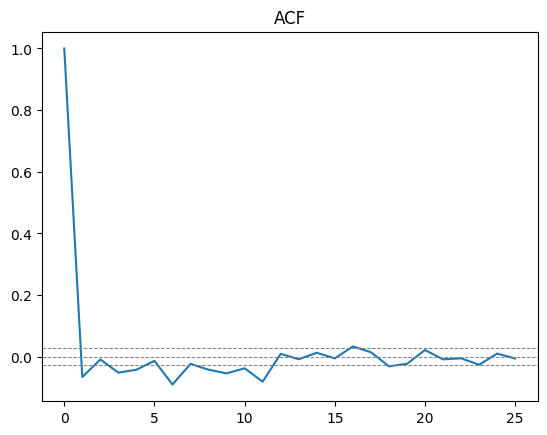

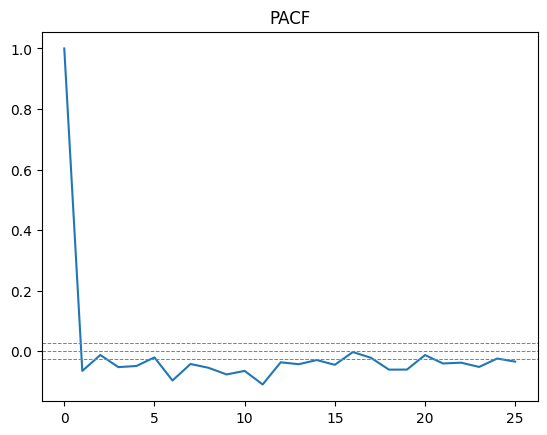

In [ ]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()

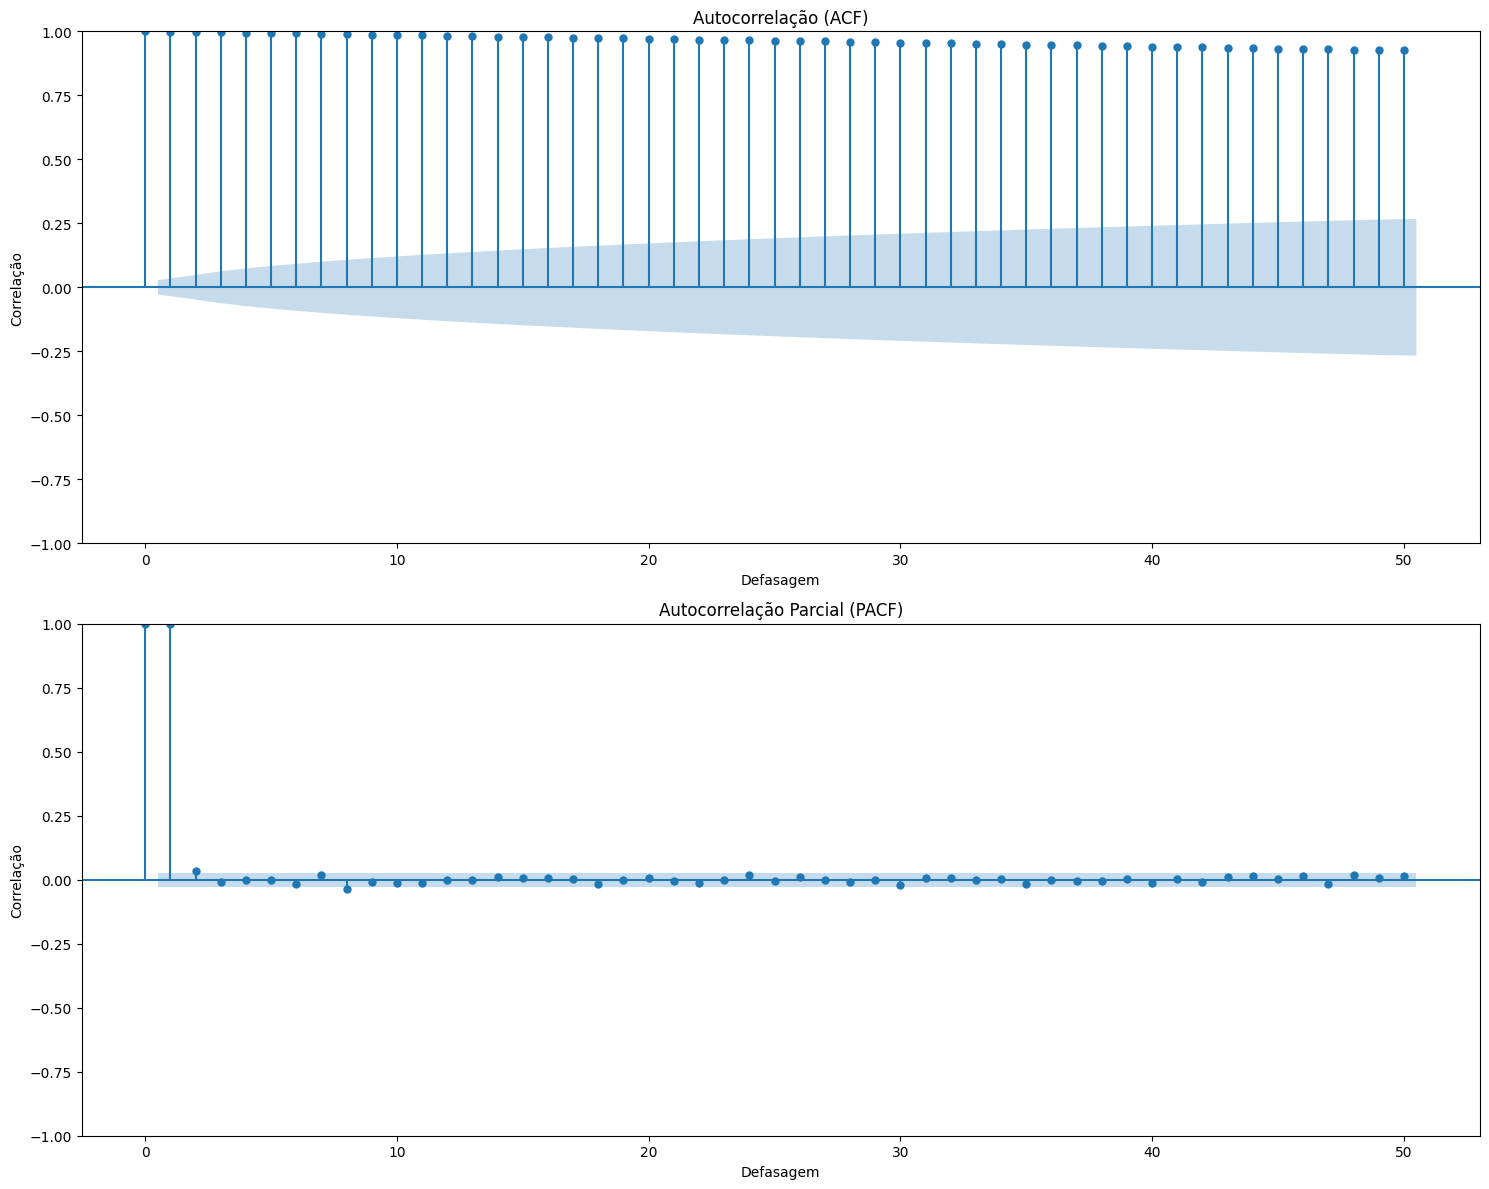

In [ ]:
# Verifica ACF e PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# ACF
acf_plot = plot_acf(df_bovespa_index['close'], ax=ax1, lags=50)
ax1.set_title("Autocorrelação (ACF)")
ax1.set_ylabel("Correlação")
ax1.set_xlabel("Defasagem")

# PACF
pacf_plot = plot_pacf(df_bovespa_index['close'], ax=ax2, lags=50)
ax2.set_title("Autocorrelação Parcial (PACF)")
ax2.set_ylabel("Correlação")
ax2.set_xlabel("Defasagem")

plt.tight_layout()

In [ ]:
# Cria vari[aveis para serem utilizadas no modelo
df_bovespa_index['Data'] = pd.to_datetime(df_bovespa_index.index, format='%d.%m.%Y', dayfirst=True)
df_bovespa_index['Dia'] = df_bovespa_index['Data'].dt.day
df_bovespa_index['Mês'] = df_bovespa_index['Data'].dt.month
df_bovespa_index['Ano'] = df_bovespa_index['Data'].dt.year
df_bovespa_index['Trimestre'] = df_bovespa_index['Data'].dt.quarter
df_bovespa_index['Dia_da_Semana'] = df_bovespa_index['Data'].dt.dayofweek
df_bovespa_index['Fim_de_Semana'] = df_bovespa_index['Dia_da_Semana'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
# Criação de lags: Lags são valores defasados de uma série temporal, ou seja, os valores anteriores a um ponto no tempo. Eles são usados para capturar dependências temporais nos dados.
# Na modelagem de séries temporais, os lags ajudam a prever o valor atual com base nos valores passados.

df_bovespa_index['Lag_1'] = df_bovespa_index['close'].shift(1)  # shift() desloca a série temporal em n períodos, criando novas colunas.
df_bovespa_index['Lag_3'] = df_bovespa_index['close'].shift(3)
df_bovespa_index['Lag_5'] = df_bovespa_index['close'].shift(5)
df_bovespa_index['Lag_7'] = df_bovespa_index['close'].shift(7)
df_bovespa_index['Lag_10'] = df_bovespa_index['close'].shift(10)

# Criação de médias móveis

df_bovespa_index['MA_5'] = df_bovespa_index['close'].rolling(window=5).mean()
df_bovespa_index['MA_10'] = df_bovespa_index['close'].rolling(window=10).mean()
df_bovespa_index['MA_20'] = df_bovespa_index['close'].rolling(window=20).mean()


In [ ]:
# Média Móvel Exponencial
df_bovespa_index['EMA_10'] = df_bovespa_index['close'].ewm(span=10, adjust=False).mean()
df_bovespa_index['EMA_20'] = df_bovespa_index['close'].ewm(span=20, adjust=False).mean()

In [ ]:
# Indice de força relativa
df_bovespa_index['RSI_14'] = calcular_RSI(df_bovespa_index['close'], 14)

In [ ]:
df_bovespa_index.head()

,ds,close,open,high,low,vol,var,anual_dias,Data,Dia,...,Lag_3,Lag_5,Lag_7,Lag_10,MA_5,MA_10,MA_20,EMA_10,EMA_20,RSI_14
Data,,,,,,,,,,,,,,,,,,,,,
2005-07-18,2005-07-18,25.321,25.222,25.412,24.916,52170000.0,0.39,2005,2005-07-18,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.321000,25.321000,NaN
2005-07-19,2005-07-19,25.271,25.312,25.312,24.960,119270000.0,-0.20,2005,2005-07-19,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.311909,25.316238,0.000000
2005-07-20,2005-07-20,25.705,25.268,25.795,24.970,130630000.0,1.72,2005,2005-07-20,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.383380,25.353263,89.669421
2005-07-21,2005-07-21,25.842,25.706,25.964,25.505,109500000.0,0.53,2005,2005-07-21,21,...,25.321,NaN,NaN,NaN,NaN,NaN,NaN,25.466766,25.399809,91.948470
2005-07-22,2005-07-22,25.391,25.834,25.848,25.244,166890000.0,-1.75,2005,2005-07-22,22,...,25.271,NaN,NaN,NaN,25.506,NaN,NaN,25.452990,25.398970,53.264925


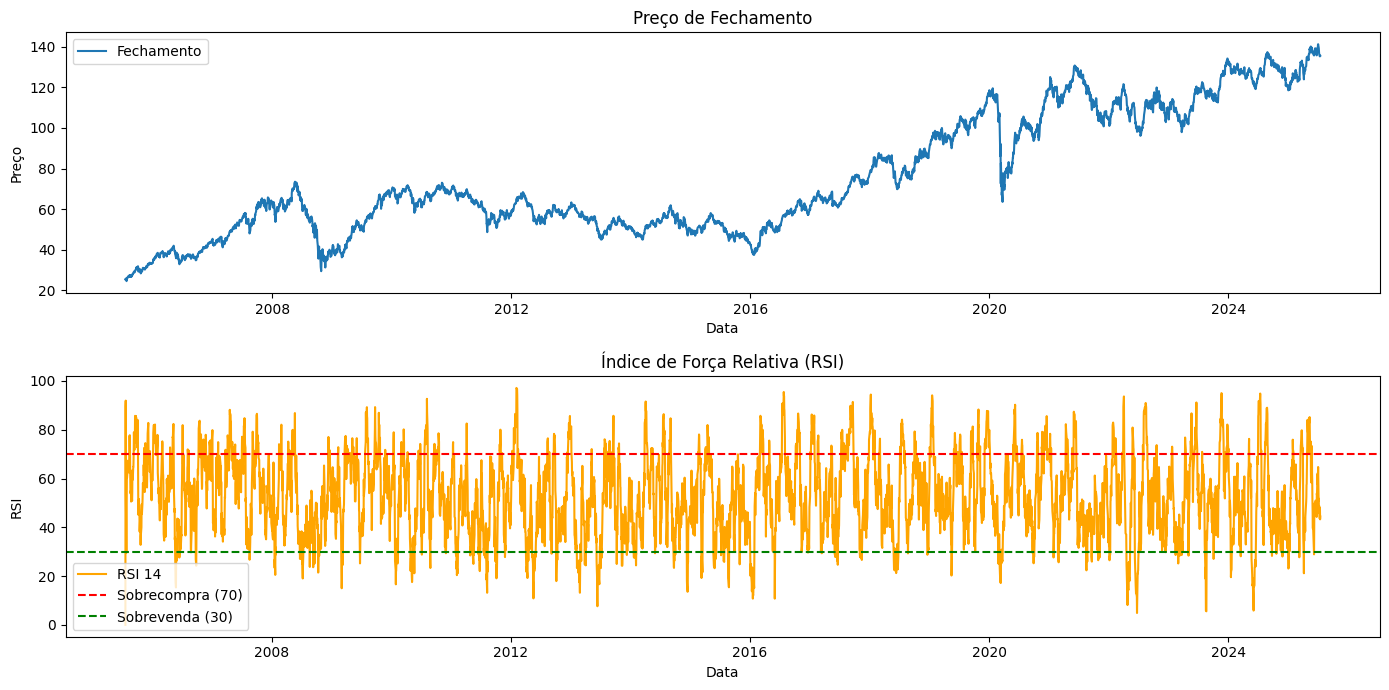

In [ ]:
plt.figure(figsize=(14, 7))

# Preço de fechamento
plt.subplot(2, 1, 1)
plt.plot(df_bovespa_index['close'], label='Fechamento')
plt.title('Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

# RSI
plt.subplot(2, 1, 2)
plt.plot(df_bovespa_index['RSI_14'], label='RSI 14', color='orange')
plt.axhline(y=70, color='red', linestyle='--', label='Sobrecompra (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Sobrevenda (30)')
plt.title('Índice de Força Relativa (RSI)')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calcula o índice de bollinger
df_bovespa_index['Upper_BB'], df_bovespa_index['Lower_BB'] = calcular_bollinger_bands(df_bovespa_index['close'], 20)

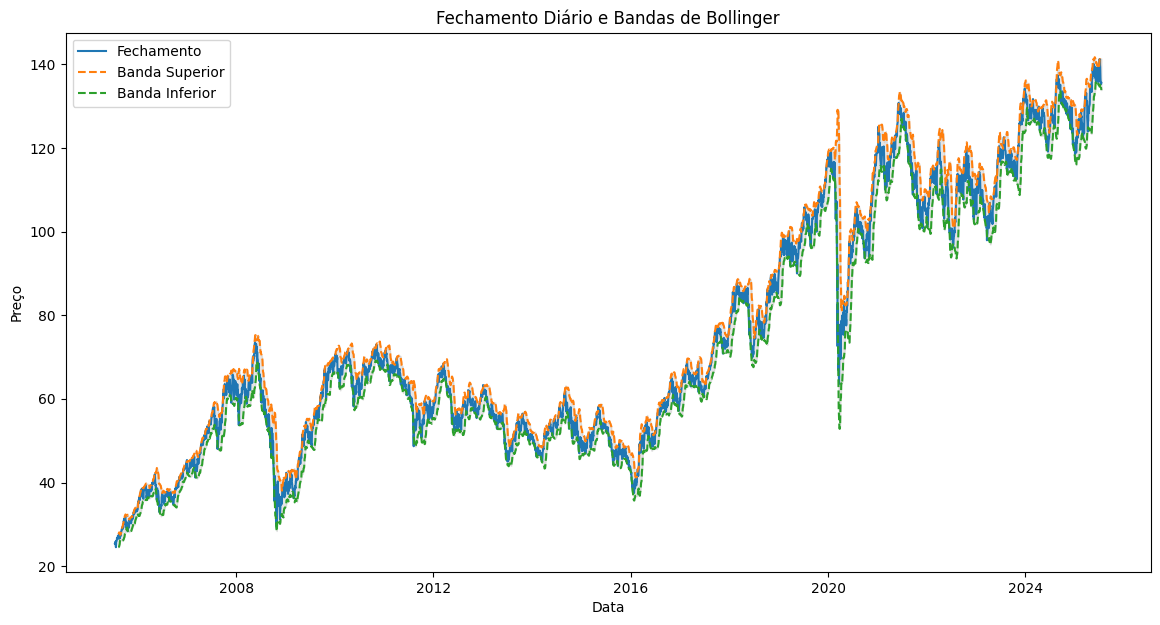

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_bovespa_index['close'], label='Fechamento')
plt.plot(df_bovespa_index['Upper_BB'], label='Banda Superior', linestyle='--')
plt.plot(df_bovespa_index['Lower_BB'], label='Banda Inferior', linestyle='--')
plt.fill_between(df_bovespa_index.index, df_bovespa_index['Upper_BB'], df_bovespa_index['Lower_BB'], color='gray', alpha=0.2)
plt.title('Fechamento Diário e Bandas de Bollinger')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

# As Bandas de Bollinger fornecem uma faixa de preço dentro da qual o ativo geralmente oscila, ajudando a identificar pontos de sobrecompra e sobrevenda.
# Quando o preço se aproxima ou ultrapassa as bandas, pode sinalizar uma possível reversão ou continuação da tendência.

In [ ]:
df_bovespa_index['var'] = df_bovespa_index['close'].pct_change() * 100 # Calcula a mudança percentual entre o preço atual e o preço anterior.

# A variação percentual diária mostra a mudança percentual no preço de fechamento de um dia para o próximo. É útil para medir a amplitude das mudanças diárias.

In [ ]:
df_bovespa_index['Volatilidade_10'] = df_bovespa_index['var'].rolling(window=10).std() # Calcula o desvio padrão móvel para os últimos 10 dias, representando a volatilidade.
df_bovespa_index['Volatilidade_20'] = df_bovespa_index['var'].rolling(window=20).std()

# A volatilidade mede a variação do preço de um ativo ao longo do tempo. Ela indica o quão estável ou instável é o preço do ativo. Altos valores de volatilidade significam grandes
# flutuações no preço, enquanto baixos valores indicam flutuações menores.


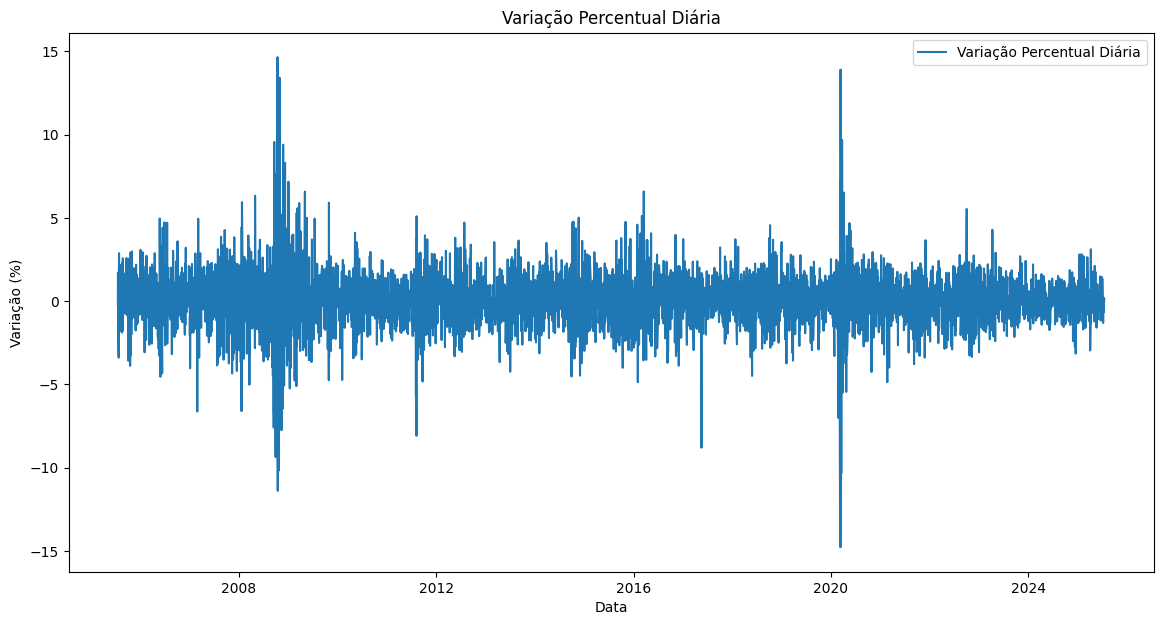

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_bovespa_index['var'], label='Variação Percentual Diária')
plt.title('Variação Percentual Diária')
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.legend()
plt.show()


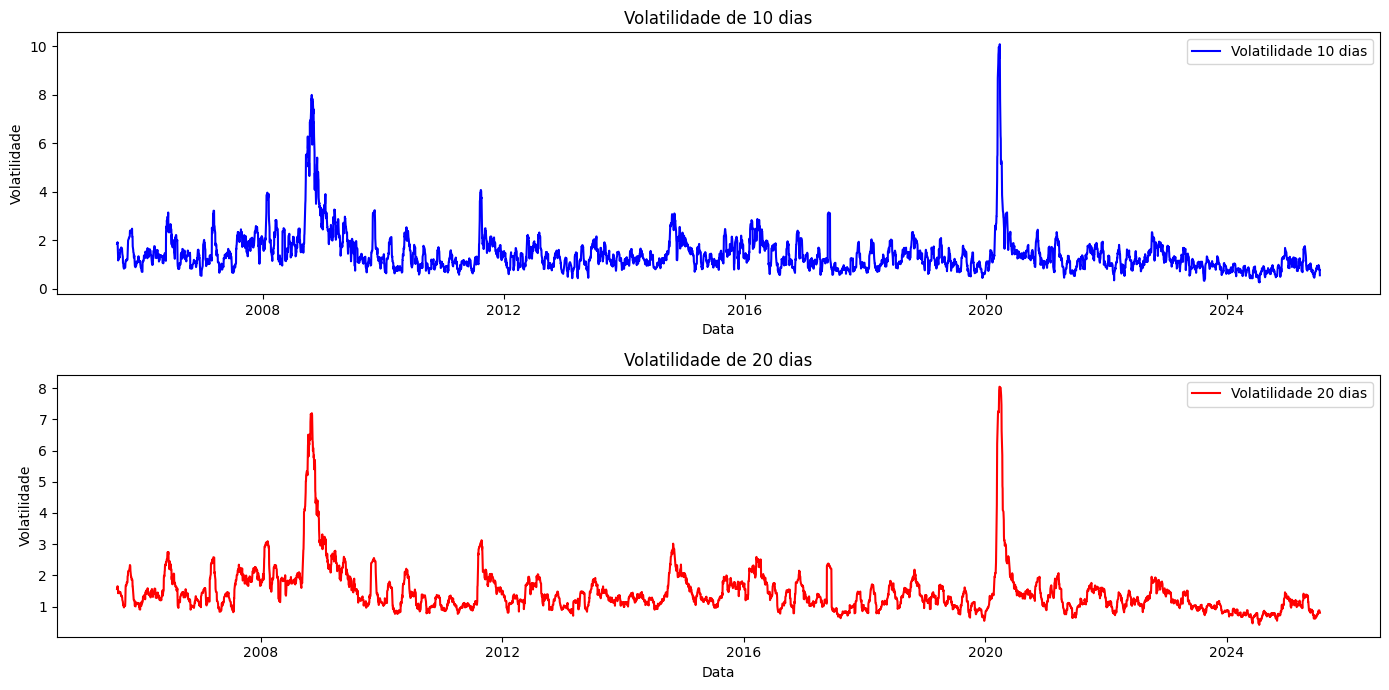

In [ ]:
plt.figure(figsize=(14, 7))

# Volatilidade de 10 dias
plt.subplot(2, 1, 1)
plt.plot(df_bovespa_index['Volatilidade_10'], label='Volatilidade 10 dias', color='blue')
plt.title('Volatilidade de 10 dias')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

# Volatilidade de 20 dias
plt.subplot(2, 1, 2)
plt.plot(df_bovespa_index['Volatilidade_20'], label='Volatilidade 20 dias', color='red')
plt.title('Volatilidade de 20 dias')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_bovespa_index = df_bovespa_index.dropna()

In [ ]:
# Criar a variavel Target (Alvo) --> 1 para sobe e 0 para desce
# Avaliamos o valor atual com o valor do proximo dia e dessa forma conseguimos definir se o dia seguinte subiu (1) ou desceu (0)

df_bovespa_index['target'] = ((df_bovespa_index['close'].shift(-1) - df_bovespa_index['close']) / df_bovespa_index['close'] > 0.005).astype(int) # Considera uma variação de 0.5 de um dia para o outro.
df_bovespa_index.tail()

,ds,close,open,high,low,vol,var,anual_dias,Data,Dia,...,MA_10,MA_20,EMA_10,EMA_20,RSI_14,Upper_BB,Lower_BB,Volatilidade_10,Volatilidade_20,target
Data,,,,,,,,,,,,,,,,,,,,,
2025-07-11,2025-07-11,136.187,136.742,136.742,135.528,7.400000e+09,-0.406602,2025,2025-07-11,11,...,138.8851,138.17280,138.056732,138.045051,48.707203,141.283769,135.061831,0.949058,0.868195,0
2025-07-14,2025-07-14,135.299,136.187,136.187,134.840,7.330000e+09,-0.652045,2025,2025-07-14,14,...,138.5295,138.07710,137.555326,137.783523,43.499164,141.421395,134.732805,0.801672,0.874722,0
2025-07-15,2025-07-15,135.250,135.298,136.022,134.380,6.900000e+09,-0.036216,2025,2025-07-15,15,...,138.0996,137.87680,137.136176,137.542235,48.011997,141.398933,134.354667,0.762468,0.794807,1
2025-07-16,2025-07-16,135.511,135.250,135.641,134.265,7.830000e+09,0.192976,2025,2025-07-16,16,...,137.7456,137.71035,136.840690,137.348784,43.274314,141.353393,134.067307,0.778357,0.797332,1
2025-07-17,2025-07-17,135.565,135.515,135.792,135.016,6.800000e+09,0.039849,2025,2025-07-17,17,...,137.2093,137.55275,136.608746,137.178900,44.451079,141.284077,133.821423,0.557052,0.798100,0


In [ ]:
# Copia base de dados para treinar modelos
df_bovespa_index_1 = df_bovespa_index.copy()

# Treinamento dos Modelos:


# Modelos de séries temporais

In [ ]:
# DF para modelos de séries temporais
df_bovespa_series_temp = df_bovespa_index_1[['ds', 'close']].copy()

In [ ]:
df_bovespa_series_temp['unique_id'] = 'serie_unica'
df_bovespa_series_temp=df_bovespa_series_temp.rename(columns={'close':'y'})
df_bovespa_series_temp.head()

,ds,y,unique_id
Data,,,
2005-08-15,2005-08-15,27.375,serie_unica
2005-08-16,2005-08-16,27.080,serie_unica
2005-08-17,2005-08-17,27.416,serie_unica
2005-08-18,2005-08-18,26.900,serie_unica
2005-08-19,2005-08-19,26.644,serie_unica


In [ ]:
df_bovespa_series_temp = df_bovespa_series_temp.dropna()

In [ ]:
treino = df_bovespa_series_temp.loc[(df_bovespa_series_temp['ds'] >= '2015-06-04') & (df_bovespa_series_temp['ds'] < '2025-06-04')]
valid = df_bovespa_series_temp.loc[(df_bovespa_series_temp['ds'] >= '2025-06-04') & (df_bovespa_series_temp['ds'] < '2025-07-17')]
h = valid['ds'].nunique()

In [ ]:
# número de dias únicos na base de validação
h

30

## Arima


wmape: 0.84%
Percentual de acerto 99.16%


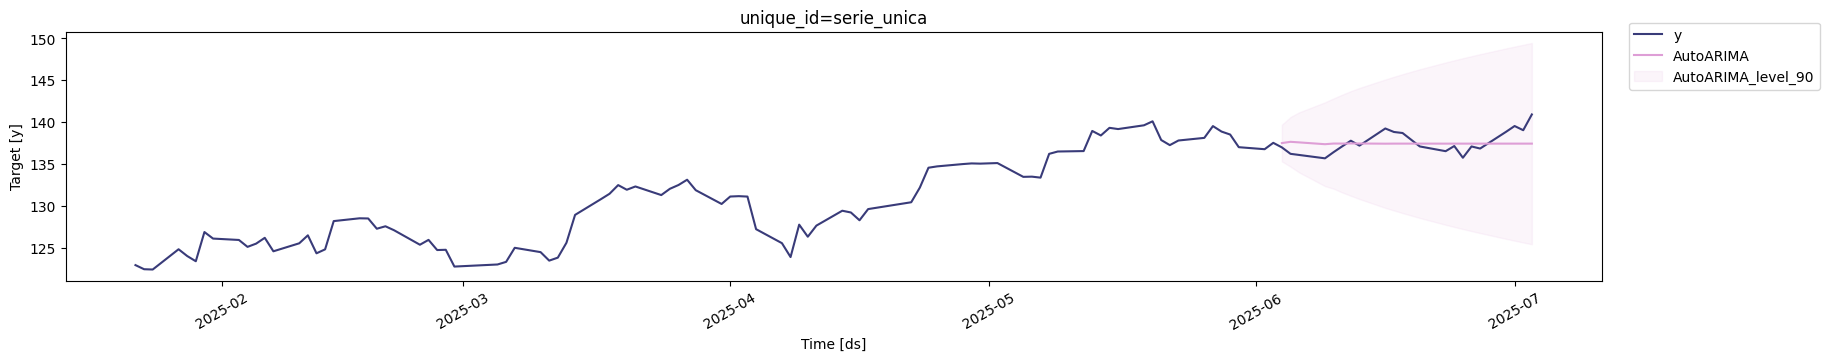

In [ ]:
# 1. Criar e treinar o modelo
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

# 2. Fazer previsões futuras
forecast_arima = model_a.predict(h=h, level=[90])
forecast_arima = forecast_arima.reset_index(drop=True).merge(valid, on=['ds', 'unique_id'], how='inner')

# 3. WMAPE com os dados reais
wmape_arima = wmape(forecast_arima['y'].values, forecast_arima['AutoARIMA'].values)
print(f'wmape: {wmape_arima:.2%}')
print(f'Percentual de acerto {1- wmape_arima:.2%}')

# 4. Plot com dados completos
model_a.plot(treino, forecast_arima, level=[90], engine ='matplotlib', max_insample_length=90)

# Prophet

WMAPE: 2.54%
Percentual de acerto (1 - WMAPE): 97.46%


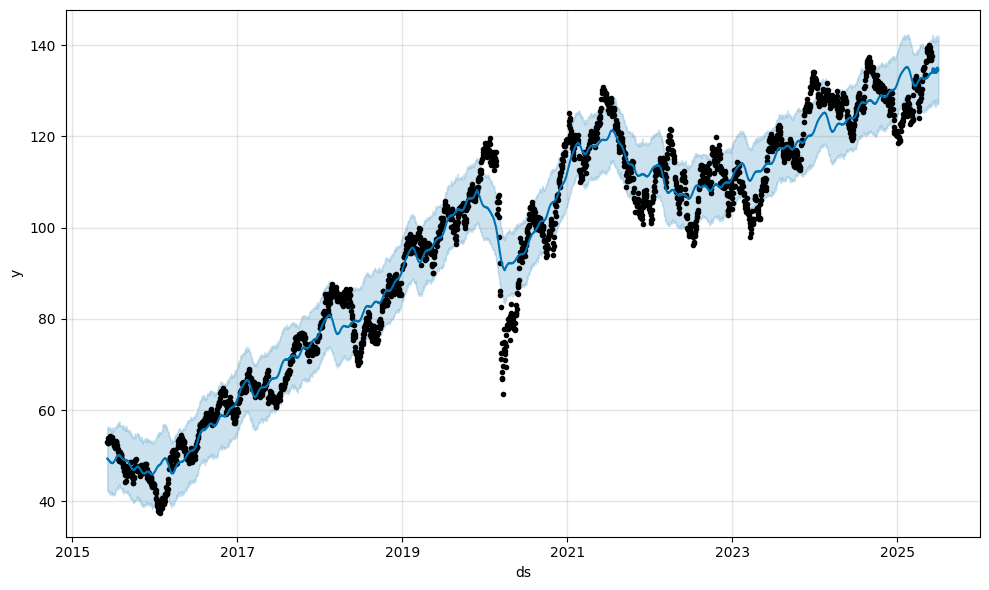

In [ ]:
# 1. Criar e treinar o modelo
model_ph = Prophet()
model_ph.fit(treino.rename(columns={'ds': 'ds', 'y': 'y'}))

# 2. Fazer previsões futuras
future_ph = model_ph.make_future_dataframe(periods=h, freq='D')
forecast_raw = model_ph.predict(future_ph)  # <-- mantém previsões completas

# 3. WMAPE com os dados reais
forecast_ph = forecast_raw[['ds', 'yhat']].merge(valid[['ds', 'y']], on='ds', how='inner')

wmape_valor = wmape(forecast_ph['y'].values, forecast_ph['yhat'].values)

print(f"WMAPE: {wmape_valor:.2%}");
print(f"Percentual de acerto (1 - WMAPE): {1 - wmape_valor:.2%}");

# 4. Plot com dados completos
fig = model_ph.plot(forecast_raw);


# Demais modelos

In [ ]:
# DF para demais modelos
df_bovespa_model = df_bovespa_index.copy()

In [ ]:
# Separa os dados para treino e teste
lista = ["ds","open", "high", "low","target", "vol", "var", "anual_dias", "Data", "Dia", "Mês", "Ano", "Trimestre", "Dia_da_Semana", "Fim_de_Semana"]

x = df_bovespa_model.drop(columns=lista)
y = df_bovespa_model["target"].copy()

print("Features (x):")
display(x.tail())

print("\nAlvo (y):")
display(y.tail())

Features (x):


,close,Lag_1,Lag_3,Lag_5,Lag_7,Lag_10,MA_5,MA_10,MA_20,EMA_10,EMA_20,RSI_14,Upper_BB,Lower_BB,Volatilidade_10,Volatilidade_20
Data,,,,,,,,,,,,,,,,
2025-07-11,136.187,136.743,139.303,141.264,139.051,136.866,137.8408,138.8851,138.17280,138.056732,138.045051,48.707203,141.283769,135.061831,0.949058,0.868195
2025-07-14,135.299,136.187,137.481,139.490,140.928,138.855,137.0026,138.5295,138.07710,137.555326,137.783523,43.499164,141.421395,134.732805,0.801672,0.874722
2025-07-15,135.250,135.299,136.743,139.303,141.264,139.549,136.1920,138.0996,137.87680,137.136176,137.542235,48.011997,141.398933,134.354667,0.762468,0.794807
2025-07-16,135.511,135.250,136.187,137.481,139.490,139.051,135.7980,137.7456,137.71035,136.840690,137.348784,43.274314,141.353393,134.067307,0.778357,0.797332
2025-07-17,135.565,135.511,135.299,136.743,139.303,140.928,135.5624,137.2093,137.55275,136.608746,137.178900,44.451079,141.284077,133.821423,0.557052,0.798100



Alvo (y):


,target
Data,
2025-07-11,0
2025-07-14,0
2025-07-15,0
2025-07-16,0
2025-07-17,0


In [ ]:
# Filtrando os últimos 30 dias
train = df_bovespa_model.iloc[-498:-31].copy()
test = df_bovespa_model.iloc[-30:].copy()

# Declarando as variáveis de treino
features = ["close","Lag_1","Lag_3", "Lag_5","Lag_7", "Lag_10", "MA_5", "MA_10", "MA_20", "EMA_10", "EMA_20", "RSI_14", "Upper_BB", "Lower_BB", "Volatilidade_10", "Volatilidade_20"]
x_train = train[features]
y_train = train['target']

# Declarando as variáveis de teste
x_test = test[features]
y_test = test['target']


In [ ]:
# Prepara o TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=20)

In [ ]:
# Normaliza os dados

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Random Forest

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(x_train_scaled, y_train)
previsao_rf = modelo_rf.predict(x_test_scaled)

In [ ]:
# XGBoost

usar_grid = "Não"

if usar_grid == "Sim":

    pipe_xgb = Pipeline(
        [
            ('scaler', StandardScaler()),
            ('clf', XGBClassifier()),
        ]
    )

    param_grid_xgb = {
        'clf__n_estimators': [50, 100, 200],  # número de árvores
        'clf__max_depth': [3, 5, 7],  # profundidade da árvore
        'clf__learning_rate': [0.01, 0.05, 0.1, 0.3],  # taxa de aprendizado
        'clf__subsample': [0.6, 0.8, 1.0],  # fração das amostras usadas em cada árvore
        'clf__colsample_bytree': [0.6, 0.8, 1.0],  # fração de colunas usadas por árvore
        'clf__gamma': [0, 0.1, 0.5, 1.0],  # regularização mínima para divisão
        'clf__reg_alpha': [0, 0.1, 1],  # L1 regularization
        'clf__reg_lambda': [0.1, 1, 10],  # L2 regularization
    }

    modelo_xgb = RandomizedSearchCV(pipe_xgb, param_grid_xgb, cv=tscv)
    modelo_xgb.fit(x_train, y_train)
    previsao_xgb = modelo_xgb.predict(x_test)

else:
    modelo_xgb = XGBClassifier(random_state=42, n_jobs = -1)
    modelo_xgb.fit(x_train_scaled, y_train)
    previsao_xgb = modelo_xgb.predict(x_test_scaled)

# Avaliação dos modelos

In [ ]:
# Prophet - previsão, merge e avaliação

model_ph = Prophet()
model_ph.fit(treino.rename(columns={'ds': 'ds', 'y': 'y'}))

future_ph = model_ph.make_future_dataframe(periods=h, freq='D')
forecast_raw = model_ph.predict(future_ph)

forecast_ph = forecast_raw[['ds', 'yhat']].merge(valid[['ds', 'y']], on='ds', how='inner')
forecast_ph.rename(columns={'yhat': 'Prophet'}, inplace=True)

report_prophet = calcula_metricas_direcao(forecast_ph, col_predicao='Prophet')

# Avaliação dos modelos temporais
report_arima = calcula_metricas_direcao(forecast_arima, col_predicao='AutoARIMA')

# Avaliação dos classificadores tradicionais
modelos_avaliados = {
    "Random Forest": {"modelo": modelo_rf, "previsoes": previsao_rf},
    "XGBoost": {"modelo": modelo_xgb, "previsoes": previsao_xgb}
}

performance = pd.DataFrame(columns=["Modelo", "Acurácia", "Precisão", "Recall", "F1-Score"])

for nome, dados in modelos_avaliados.items():
    report = classification_report(y_test, dados["previsoes"], output_dict=True, zero_division=0)
    performance.loc[performance.shape[0]] = {
        "Modelo": nome,
        "Acurácia": report["accuracy"],
        "Precisão": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
    }

# Adiciona os modelos temporais
performance.loc[performance.shape[0]] = {
    "Modelo": "AutoARIMA",
    "Acurácia": report_arima["accuracy"],
    "Precisão": report_arima["weighted avg"]["precision"],
    "Recall": report_arima["weighted avg"]["recall"],
    "F1-Score": report_arima["weighted avg"]["f1-score"],
}

performance.loc[performance.shape[0]] = {
    "Modelo": "Prophet",
    "Acurácia": report_prophet["accuracy"],
    "Precisão": report_prophet["weighted avg"]["precision"],
    "Recall": report_prophet["weighted avg"]["recall"],
    "F1-Score": report_prophet["weighted avg"]["f1-score"],
}

# Formatação final
performance.set_index("Modelo", inplace=True)
performance_formatada = performance.sort_values(by="Acurácia", ascending=False)
performance_formatada = performance_formatada.applymap(lambda x: f"{(100 * x):.2f} %")

display(performance_formatada)


,Acurácia,Precisão,Recall,F1-Score
Modelo,,,,
XGBoost,80.00 %,64.00 %,80.00 %,71.11 %
Random Forest,76.67 %,71.85 %,76.67 %,73.46 %
AutoARIMA,70.00 %,70.00 %,70.00 %,70.00 %
Prophet,55.00 %,56.88 %,55.00 %,54.66 %
